In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task3-aqi.ipynb")

# Task 3: Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

This task covers topics on the lesson on [time series](https://meds-eds-220.github.io/MEDS-eds-220-course/book/chapters/lesson-7-time-series.html). 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/sofiasarak/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/131OnUDOLpOl94SlaMU9nGqT998ABrjFS/edit?usp=sharing&ouid=111507336322611936333&rtpof=true&sd=true) before starting.

- **Make at least 5 commits. Generally, commit every time you finish a major step.** We'll check your repository and view the commit history.

- **Add comments for all your code.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

Text(0.5, 1.0, 'Rolling average calculated over a 5 day window')

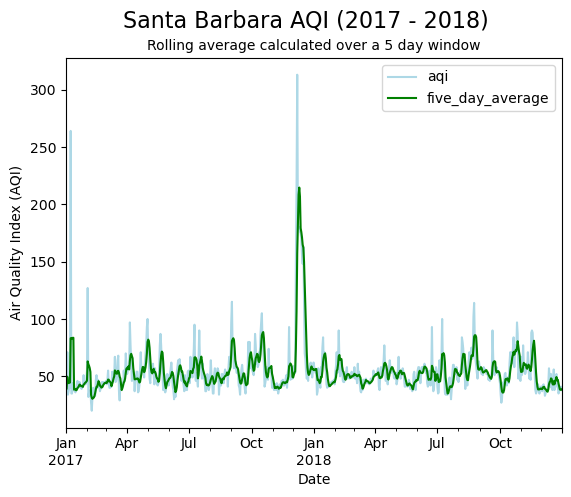

In [31]:
# Importing pandas library
import pandas as pd

# Importing matplot library (will be used for titles of plot, later)
import matplotlib.pyplot as plt

# Defining the URLs of the two data sets
URL17 = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip'
URL18 = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip'

# Read in data
aqi_17 = pd.read_csv(URL17, compression='zip') # The compression='zip' arguments tells read_csv that the URL contains a zip file
aqi_18 = pd.read_csv(URL18, compression='zip')

# .concat() method takes a list of data frames, and stacks them on top of each other
aqi = pd.concat([aqi_17, aqi_18]) # We feed it a list of data frames we want to combine

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_'))

# Accessing the 'county_name' column from aqi using []
# Selecting only for rows where == "Santa Barbara" is True, out of aqi
# And assigning to aqi_sb object
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]

# .drop() method, supplied with a list of column names, removes the columns we do not want
aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])
               
# pd.to_datetime() method converts various data types into date time objects
# We supply it with the 'date' column of aqi_sb, accessed via []
# And assign it to the 'date' column, accessed via .date and using = 
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# set_index() method, used on aqi_sb and supplied with the 'date' column, changes the index for us
aqi_sb = aqi_sb.set_index('date')
               
# Calculate AQI rolling average over 5 days

# The rolling operation is applied to aqi_sb data frame, with specification of a 5 day window
# Then, we take the mean of the 'aqi' columns
rolling_average1 = aqi_sb.rolling(window = '5D').mean('aqi')

# The code above produced an output that also contained the means of the 'number_of_sites_reporting' column
# We drop that in this step using .drop() method and specifying its name
rolling_average = rolling_average1.drop(columns = 'number_of_sites_reporting')
               
# We define/initialize 'five_day_average' within aqi_sb using []
# And assign it to the 'aqi' column of our rolling_average data frame
aqi_sb['five_day_average'] = rolling_average['aqi']

# Method chaining on aqi_sb // .plot() initializes line plot (default)
aqi_sb.plot(y = ['aqi', 'five_day_average'],   # Select the columns we want plotted
           xlabel = "Date",                    # Setting x label
           ylabel = "Air Quality Index (AQI)", # Setting y label
           color = ["lightblue", "green"])     # Setting line colors 

# Adding on matplot methods for more title functionality
plt.suptitle("Santa Barbara AQI (2017 - 2018)", fontsize=16)             # Defining "first" title, specifying larger font
plt.title("Rolling average calculated over a 5 day window", fontsize=10) # Subtitle, smaller font

## 1

a. Read the [Air Quality Index (AQI) Basics](https://www.airnow.gov/aqi/aqi-basics/) from the AirNow.gov portal.

b. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 

c. Under "Donwload Data", click on "Pre-generated Data Files".

d. Read the "About the data" section.

## 2
a. Back in the "Pre-generated Data Files" site, click on "Tables of Daily AQI".

b. Copy the URL to the 2017 Daily AQI **by County** ZIP file `daily_aqi_by_county_2017.zip`

Notice we'll be reding the data directly from its ZIP file link. This ZIP file contains a single CSV that has been compressed to save space. 

<!-- BEGIN QUESTION -->

c. In the next code cell read in the data from the URL using the [`pd.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function with the `compression='zip'` parameter added and store it as `aqi_17`. 

d. In the same cell, read in the data for the 2018 Daily AQI by County ZIP file and store it as `aqi_18`.

In [2]:
# Importing pandas library
import pandas as pd

# Defining the URLs of the two data sets
URL17 = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip'
URL18 = 'https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip'

# Read in data
aqi_17 = pd.read_csv(URL17, compression='zip') # The compression='zip' arguments tells read_csv that the URL contains a zip file
aqi_18 = pd.read_csv(URL18, compression='zip')

<!-- END QUESTION -->

## 3
a. and b. Use the next two code cells to look at the head of both data frames. Store your results in `aqi_17_head` and `aqi_18_head`. 

In [3]:
# a.
# The method .head() to access the first 5 rows of both data frames
# And storing them as separate objects
aqi_17_head = aqi_17.head()

In [4]:
# b.
aqi_18_head = aqi_18.head()

In [5]:
grader.check("q3_a")

q3_a results: All test cases passed!

<!-- BEGIN QUESTION -->

c. Use this code cell to make some other preliminary data exploration of your choosing.

In [6]:
# Finding the number of rows and columns of both data frames
print(aqi_17.shape)
print(aqi_18.shape) # the two data frames have the same # of columns, but diff # of rows

# Exploring the columns in each data set
aqi_17_col = aqi_17.columns
aqi_18_col = aqi_18.columns

# Are they the same?
print(aqi_17_col == aqi_18_col)

# They are the same, so let's look at just one of them
print(aqi_17_col)

# What are some of the defining parameters?
# The method .unique() gives us the different values stored in the 'Defining Parameter' column
aqi_17['Defining Parameter'].unique()

# Finally, what are the data types of all the columns? The method .dtypes tells us
aqi_17.dtypes

(326801, 10)
(327541, 10)
[ True  True  True  True  True  True  True  True  True  True]
Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')


State Name                   object
county Name                  object
State Code                    int64
County Code                   int64
Date                         object
AQI                           int64
Category                     object
Defining Parameter           object
Defining Site                object
Number of Sites Reporting     int64
dtype: object

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

d. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

**Dimensions of data frame (`.shape`)**

This allowed me to see the number of rows and columns in the two data frames. Not only did it give me a better idea of how big of a data set I was working with, but it also helped me initially compare the years 2017 and 2018, to see if they are generally the same size/shape.

**Exploring columns (`.columns`)**

This command extracts just the column names of the two data sets. I saved them as separate variables in order to be able to compare them in the next step. Once my boolean/comparison returned all trues, I was confident that the two data frames had the same columns, and so I called just one of them (using `print()`) to view what data I had.

**Data types (`.dtypes`)**

This tells us the kind of data that is stored in each column. It is useful as this information can change what kind of operations/methods you can apply to each column. For example, we can use string methods on columns defined as having the 'object' data type. It might also prompt me to go ahead and change some of the data types, like the 'Date' column into a DateTime object.

<!-- END QUESTION -->

## 4
We currently have two separate data frames. For this exercise we will need to "glue" them one on top of the other. The `pandas` function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

NOTE: When we concatenate data frames like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the mismatch between the index of `aqi` and the number of rows i the complete data frame.


In [7]:
# .concat() method takes a list of data frames, and stacks them on top of each other
aqi = pd.concat([aqi_17, aqi_18]) # We feed it a list of data frames we want to combine
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327536,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327537,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327538,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


In [8]:
grader.check("q4")

q4 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 5

Run the following code cell and use the next markdown cell to give a line by line explanation of the code below the comment "#Simplify column names". You might need to look up the `pandas` documentation.

In [9]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



**Code Explanation:**

`aqi.columns`: the 'columns' attribute accesses the column names within the aqi data frame (also seen in data exploration, question 3).

`=`: the equals symbol tells us that we are *reassigning* the columns in the aqi data frame to something new

The code within the parenthese contains a method chain, also acting upon `aqi.columns` (which is the first part of the chain).

`.str.lower()`: changes all of the column name strings to lowercase. `.str` tells us we're working with strings.

`.str.replace(' ', '_')`: in the column name strings, changes all spaces to underscores.

`print(aqi.columns, '/n')`: prints the new column names. The '/n' argument simply ensures that this output is printed on the *next* line, relative to the old aqi.columns / the first print message.

*Ultimately, this code is putting all of the column names in the aqi data frame into lower snake case.*

<!-- END QUESTION -->

## 6
In the next code cell:

a. Select only data from `Santa Barbara` county and store it in a new variable `aqi_sb`.

b. Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`.

Your dataframe should have the following columns in this order: `date`, `aqi`, `category`, `defining_parameter`, `defining_stie`, `number_of_sites_reporting`. 

In [10]:
# Accessing the 'county_name' column from aqi using []
# Selecting only for rows where == "Santa Barbara" is True, out of aqi
# And assigning to aqi_sb object
aqi_sb = aqi[aqi['county_name'] == "Santa Barbara"]

# .drop() method, supplied with a list of column names, removes the columns we do not want
aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])
aqi_sb

,date,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
28648,2017-01-01,39,Good,Ozone,06-083-4003,12
28649,2017-01-02,39,Good,PM2.5,06-083-2011,11
28650,2017-01-03,71,Moderate,PM10,06-083-4003,12
28651,2017-01-04,34,Good,Ozone,06-083-4003,13
28652,2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...,...
29128,2018-12-27,37,Good,Ozone,06-083-1025,11
29129,2018-12-28,39,Good,Ozone,06-083-1021,12
29130,2018-12-29,39,Good,Ozone,06-083-1021,12
29131,2018-12-30,41,Good,PM2.5,06-083-1008,12


In [11]:
grader.check("q6a")

q6a results: All test cases passed!

 
c. What is the data type of the `date` column? Write your answer in the markdown cell below. 

**Response:** When you call `.dtypes` on the 'date' column of the aqi_sb data frame (see below), it returns 'dtype('0')'. This is telling us that the 'date' column contains a Python object, which is also known as a Python type string.

In [12]:
# Applying the .dtypes attribute on the single column 'date', of aqi_sb
aqi_sb['date'].dtypes

dtype('O')

*Your answer here.*

<!-- BEGIN QUESTION -->

## 7
In the following cell:
1. Update the date column of `aqi_sb` to be a `pandas.datetime` object.
2. Update the index of `aqi_sb` to be the `date` column.

In [13]:
# pd.to_datetime() method converts various data types into date time objects
# We supply it with the 'date' column of aqi_sb, accessed via []
# And assign it to the 'date' column, accessed via .date and using = 
aqi_sb.date = pd.to_datetime(aqi_sb['date'])

# set_index() method, used on aqi_sb and supplied with the 'date' column, changes the index for us
aqi_sb = aqi_sb.set_index('date')
aqi_sb

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12
2017-01-02,39,Good,PM2.5,06-083-2011,11
2017-01-03,71,Moderate,PM10,06-083-4003,12
2017-01-04,34,Good,Ozone,06-083-4003,13
2017-01-05,37,Good,Ozone,06-083-4003,12
...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11
2018-12-28,39,Good,Ozone,06-083-1021,12
2018-12-29,39,Good,Ozone,06-083-1021,12


<!-- END QUESTION -->

## 8
In the next cell we will calculate an average over a [rolling window](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html) using the `rolling()`method for `pandas.Series`:

- `rolling()` is a lazy method, so we need to specify what we want to calculate over each window before it does something. 
- in this example we use the aggregator function `mean()` to calculate the average over each window
- the parameter '5D' indicates we want the window for our rolling average to be 5 days. 
- we get a `pandas.Series` as ouput

Store your answer in the `rolling_average` variable. You should have two columns in your series, `date` and the averages. 

In [14]:
# Calculate AQI rolling average over 5 days

# The rolling operation is applied to aqi_sb data frame, with specification of a 5 day window
# Then, we take the mean of the 'aqi' columns
rolling_average1 = aqi_sb.rolling(window = '5D').mean('aqi')

# The code above produced an output that also contained the means of the 'number_of_sites_reporting' column
# We drop that in this step using .drop() method and specifying its name
rolling_average = rolling_average1.drop(columns = 'number_of_sites_reporting')

rolling_average

,aqi
date,
2017-01-01,39.000000
2017-01-02,39.000000
2017-01-03,49.666667
2017-01-04,45.750000
2017-01-05,44.000000
...,...
2018-12-27,41.200000
2018-12-28,38.600000
2018-12-29,38.200000


In [15]:
grader.check("q8")

q8 results: All test cases passed!

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named `five_day_average` to the `aqi_sb` dataframe. 

In [16]:
# We define/initialize 'five_day_average' within aqi_sb using []
# And assign it to the 'aqi' column of our rolling_average data frame
aqi_sb['five_day_average'] = rolling_average['aqi']
aqi_sb

,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,39,Good,PM2.5,06-083-2011,11,39.000000
2017-01-03,71,Moderate,PM10,06-083-4003,12,49.666667
2017-01-04,34,Good,Ozone,06-083-4003,13,45.750000
2017-01-05,37,Good,Ozone,06-083-4003,12,44.000000
...,...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11,41.200000
2018-12-28,39,Good,Ozone,06-083-1021,12,38.600000
2018-12-29,39,Good,Ozone,06-083-1021,12,38.200000


In [17]:
grader.check("q9")

q9 results: All test cases passed!

<!-- BEGIN QUESTION -->

## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Make necessary updates for the plot to be accurate, informative, and polished, even if simple. You're welcome to use plotting methods and packages beyond what we have covered in class! 

Can you see the AQI going up during the Thomas Fire in December 2017?

Text(0.5, 1.0, 'Rolling average calculated over a 5 day window')

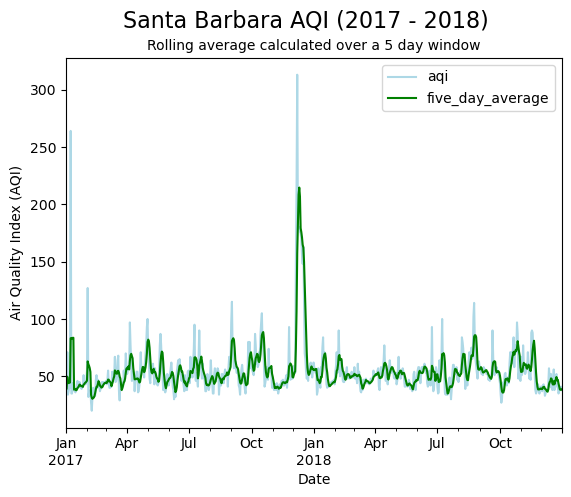

In [28]:
# Importing matplot library (will be used for titles of plot)
import matplotlib.pyplot as plt

# Method chaining on aqi_sb // .plot() initializes line plot (default)
aqi_sb.plot(y = ['aqi', 'five_day_average'],   # Select the columns we want plotted
           xlabel = "Date",                    # Setting x label
           ylabel = "Air Quality Index (AQI)", # Setting y label
           color = ["lightblue", "green"])     # Setting line colors 

# Adding on matplot methods for more title functionality
plt.suptitle("Santa Barbara AQI (2017 - 2018)", fontsize=16)             # Defining "first" title, specifying larger font
plt.title("Rolling average calculated over a 5 day window", fontsize=10) # Subtitle, smaller font

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [19]:
grader.check_all()

q3_a results: All test cases passed!

q4 results: All test cases passed!

q6a results: All test cases passed!

q8 results: All test cases passed!

q9 results: All test cases passed!

<!-- END QUESTION -->

## 11


Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).